### Importing the libraries 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import math
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn import preprocessing

### Reading the file

In [2]:
df = pd.read_csv("measurements.csv")
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


### Standardize header names

In [3]:
#1. user lower case
df.columns = df.columns.str.lower()

#2.removing spaces and adding underscore
df.columns = df.columns.map(lambda x: x.replace(" ","_"))
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   ac             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill_liters  13 non-null     object
 11  refill_gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


### Dropping duplicates

In [6]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)


In [7]:
df.shape

(388, 12)

### Checking for the null values

In [8]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

### Dropping "refill_gas", "refill_liters" and "specials" while they have a lot of missing values

In [9]:
df = df.drop(['refill_gas', 'refill_liters', 'specials'], axis=1)

In [10]:
df.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
ac               0
rain             0
sun              0
dtype: int64

### Replacing the null values with the mean

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df.isna().sum()

distance         0
consume          0
speed            0
temp_inside     12
temp_outside     0
gas_type         0
ac               0
rain             0
sun              0
dtype: int64

### Converting "consume", "distance" and "temp_inside" to numeric values and replacing null values of the numericals columns with the mean.

In [13]:
df['consume'] = pd.to_numeric(df['consume'], errors='coerce')
df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
df['temp_inside'] = pd.to_numeric(df['temp_inside'], errors='coerce')

numericals=df.select_dtypes(include=np.number)
numericals

numericals.fillna(numericals.mean(), inplace=True)

### Checking for the null values after replacing them with the mean.

In [14]:
numericals.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
ac              0
rain            0
sun             0
dtype: int64

### The columns that are categorical:

In [15]:
categoricals=df.select_dtypes(include=object)
categoricals

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10
...,...
383,SP98
384,SP98
385,SP98
386,SP98


In [16]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
count,52.000000,49.000000,388.000000,169.000000,388.000000,388.000000,388.000000,388.000000
mean,19.596154,4.816327,41.927835,21.934911,11.358247,0.077320,0.123711,0.082474
std,27.855552,0.858134,13.598524,1.230283,6.991542,0.267443,0.329677,0.275441
min,2.000000,4.000000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,14.000000,4.000000,32.750000,22.000000,7.000000,0.000000,0.000000,0.000000
50%,16.000000,5.000000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,17.000000,5.000000,50.000000,22.000000,16.000000,0.000000,0.000000,0.000000
max,211.000000,9.000000,90.000000,25.000000,31.000000,1.000000,1.000000,1.000000


#### Checking for outliers

<Figure size 432x288 with 0 Axes>

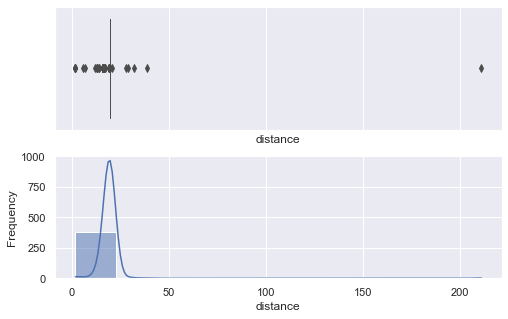

<Figure size 576x360 with 0 Axes>

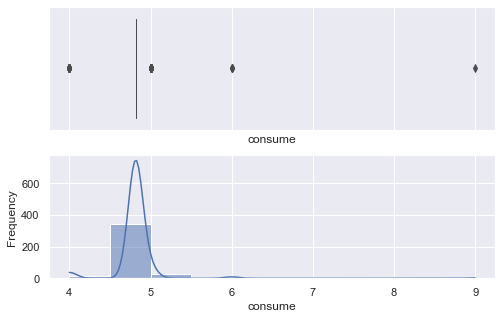

<Figure size 576x360 with 0 Axes>

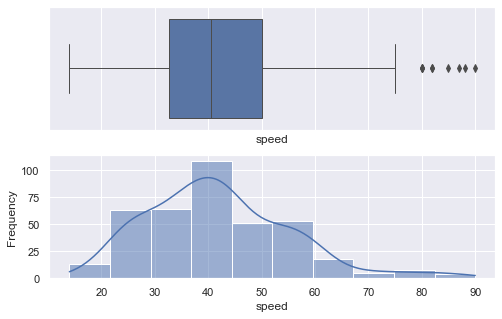

<Figure size 576x360 with 0 Axes>

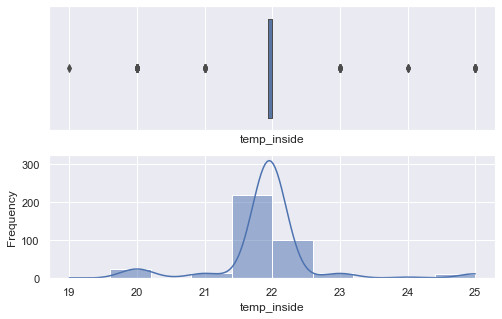

<Figure size 576x360 with 0 Axes>

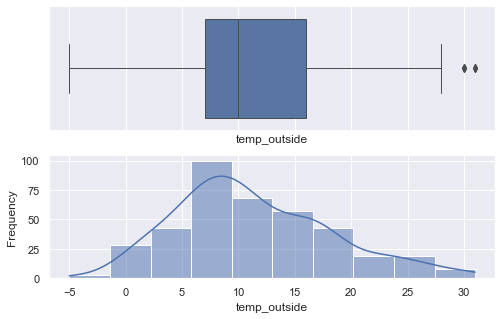

<Figure size 576x360 with 0 Axes>

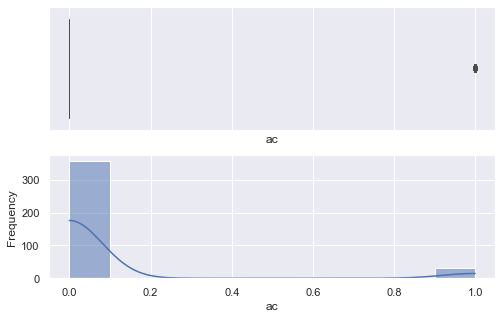

<Figure size 576x360 with 0 Axes>

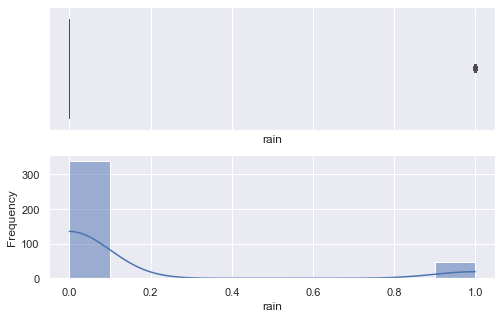

<Figure size 576x360 with 0 Axes>

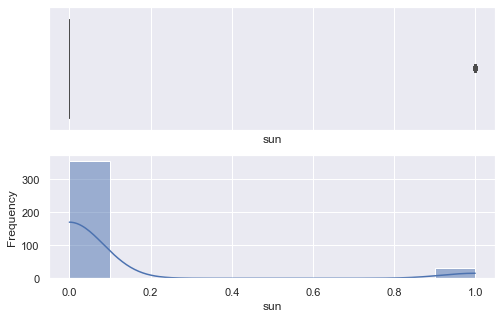

In [17]:
for i in numericals.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(numericals[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(numericals[i], ax=ax_hist , bins = 10,kde=True)  

It can be observed that speed, temp_inside and distance have outliers. However, I decided to keep them as so not to lose data.

### Categorical columns:

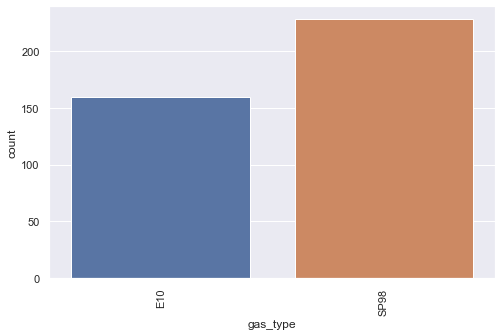

In [18]:
for i, col in enumerate(categoricals.columns):
    plt.figure(i)
    chart = sns.countplot(x=col, data=categoricals)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

### Multicollinearity

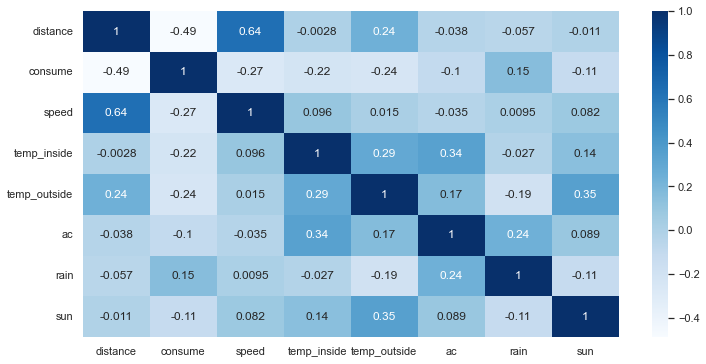

In [19]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

### Here we see that the highest correlation is between distance and speed, followed by temp_outside-sun, temp_inside-ac.  The lowest correlation is between temp_inside and distance.

### Pairplots

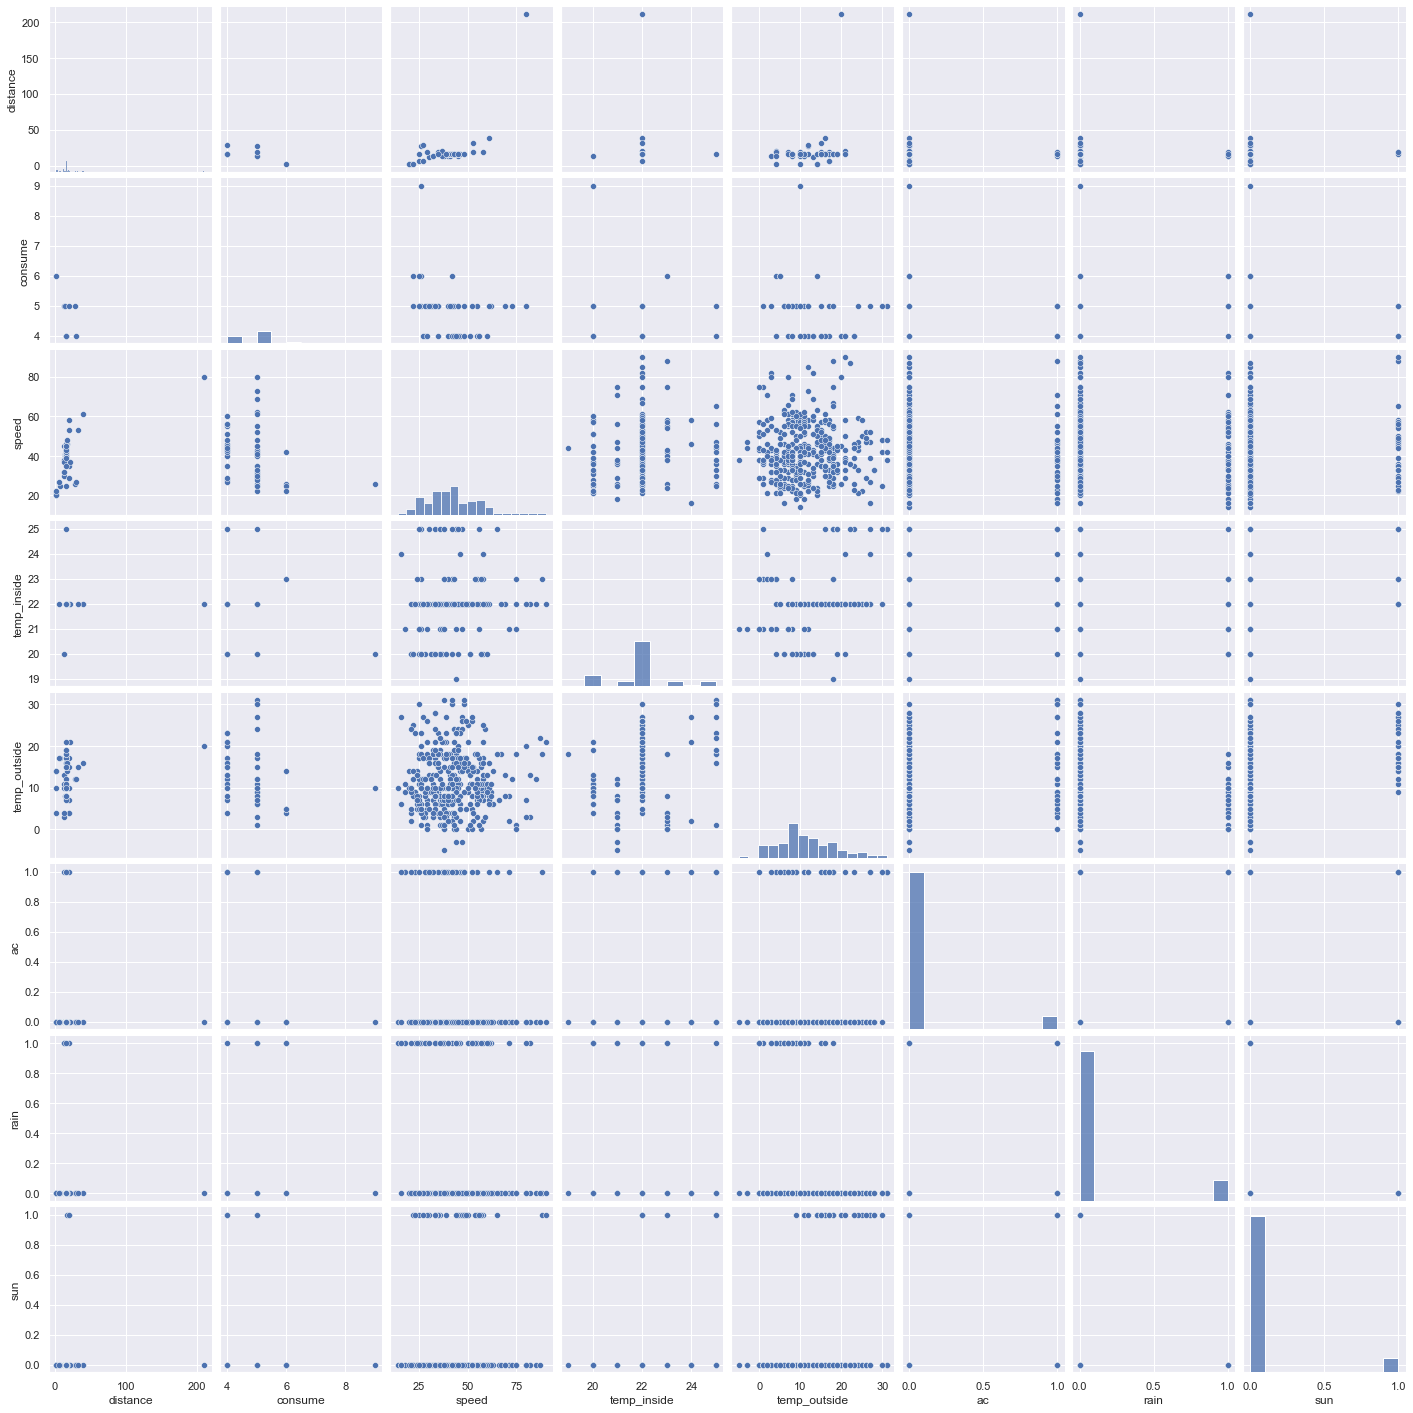

In [20]:
sns.pairplot(df)

### Defining the scalers

In [21]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = PolynomialFeatures(degree=2, interaction_only=True) 

In [22]:
X = pd.concat([numericals, categoricals], axis = 1)
X = X.drop(['gas_type'], axis = 1)
y = df['gas_type']
X

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,28.000000,5.000000,26,21.934911,12,0,0,0
1,12.000000,4.816327,30,21.934911,13,0,0,0
2,19.596154,4.816327,38,21.934911,15,0,0,0
3,19.596154,4.816327,36,21.934911,14,0,0,0
4,19.596154,4.816327,46,21.934911,15,0,0,0
...,...,...,...,...,...,...,...,...
383,16.000000,4.816327,39,21.934911,18,0,0,0
384,19.596154,4.816327,38,25.000000,31,1,0,0
385,16.000000,4.816327,45,25.000000,19,0,0,0
386,19.596154,4.816327,42,25.000000,31,1,0,0


### Target feature:

In [23]:
y

0       E10
1       E10
2       E10
3       E10
4       E10
       ... 
383    SP98
384    SP98
385    SP98
386    SP98
387    SP98
Name: gas_type, Length: 388, dtype: object

### Split Train and test data set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

### Logistic Regression

In [25]:
#Fitting and transforming Data
X_train = scaler2.fit_transform(X_train)
X_test =  scaler2.transform(X_test)

In [26]:
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

print("Train Score : {}".format(logreg.score(X_train, y_train)))
print('Test Score : {}'.format(logreg.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.50      0.20      0.29        40
           1       0.60      0.86      0.71        57

    accuracy                           0.59        97
   macro avg       0.55      0.53      0.50        97
weighted avg       0.56      0.59      0.54        97

Train Score : 0.5910652920962199
Test Score : 0.5876288659793815


### Example of Grid searching key hyperparametres for Logistic Regression

In [27]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Define Dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# Define Models and Parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# Define Grid Search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# Summarize Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.587586 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.579847 (0.066679) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.579847 (0.066679) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.579847 (0.066679) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.582107 (0.073818) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.582107 (0.073818) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.582107 (0.073818) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.579579 (0.066253) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.579579 (0.066253) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.576130 (0.067892) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.587586 (0.004138) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.587586 (0.004138) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.587586 (0.004138) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.587586 (0.004138) wit

In [28]:
#Fitting and transforming Data
X_train = scaler1.fit_transform(X_train)
X_test =  scaler1.transform(X_test)

In [59]:
logreg = LogisticRegression( random_state=42, C=0.1 , penalty='l2', solver= 'newton-cg')

In [60]:
# Fit the Model with Data
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42, solver='newton-cg')

In [61]:
# Predictions
y_pred = logreg.predict(X_test)

In [62]:
y_pred

array(['SP98', 'SP98', 'E10', 'E10', 'SP98', 'SP98', 'SP98', 'E10',
       'SP98', 'SP98', 'SP98', 'SP98', 'SP98', 'E10', 'SP98', 'E10',
       'SP98', 'SP98', 'SP98', 'E10', 'SP98', 'SP98', 'E10', 'SP98',
       'E10', 'E10', 'SP98', 'SP98', 'E10', 'E10', 'SP98', 'SP98', 'SP98',
       'SP98', 'E10', 'E10', 'E10', 'SP98', 'SP98', 'E10', 'SP98', 'E10',
       'SP98', 'SP98', 'E10', 'SP98', 'SP98', 'E10', 'SP98', 'E10',
       'SP98', 'SP98', 'E10', 'SP98', 'E10', 'SP98', 'SP98', 'SP98',
       'SP98', 'SP98', 'SP98', 'SP98', 'SP98', 'SP98', 'SP98', 'SP98',
       'SP98', 'SP98', 'E10', 'E10', 'SP98', 'E10', 'SP98', 'SP98', 'E10',
       'SP98', 'E10', 'SP98'], dtype=object)

In [63]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        36
           1       0.56      0.69      0.62        42

    accuracy                           0.54        78
   macro avg       0.53      0.53      0.52        78
weighted avg       0.53      0.54      0.53        78



As we can see from the result the hyperparameter tunning its not helping 

In [64]:
print("Train Score : {}".format(logreg.score(X_train, y_train)))
print('Test Score : {}'.format(logreg.score(X_test, y_test)))

Train Score : 0.7774193548387097
Test Score : 0.5384615384615384


### KNeighborsClassifier

In [35]:
X = pd.concat([numericals, categoricals], axis = 1)
X = X.drop(['gas_type'], axis = 1)
y = df['gas_type']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

In [71]:
#Fitting and transforming Data
X_train = scaler1.fit_transform(X_train)
X_test =  scaler1.transform(X_test)

In [72]:
# Instance of the model with n_neighbors=4
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=4)  
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [73]:
print("Train Score : {}".format(classifier.score(X_train, y_train)))
print('Test Score : {}'.format(classifier.score(X_test, y_test)))

Train Score : 0.7419354838709677
Test Score : 0.5384615384615384


In [74]:
baseline_classification = LogisticRegression(max_iter=1000) 
classifier = KNeighborsClassifier(n_neighbors=25) 

In [75]:
def model_application(df, scaler, model, X_train, X_test, y_train, y_test): 
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    classifier.fit(X_train,y_train)
    print(classification_report(y_test, classifier.predict(X_test)))

In [76]:
model_application(df, scaler1, classifier, X_train, X_test, y_train, y_test) 

              precision    recall  f1-score   support

         E10       0.64      0.39      0.48        36
        SP98       0.61      0.81      0.69        42

    accuracy                           0.62        78
   macro avg       0.62      0.60      0.59        78
weighted avg       0.62      0.62      0.60        78



### Decision Trees

In [201]:
X = pd.concat([numericals, categoricals], axis = 1)
X = X.drop(['gas_type'], axis = 1)
y = df['gas_type']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [224]:
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [225]:
# min_samples_leaf=50 allows to have more elements in the leaves, so less nodes and the tree is shallower.
classifier = DecisionTreeClassifier(min_samples_leaf=100)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [226]:
classifier.get_depth()

2

In [227]:
y_pred = classifier.predict(X_test)

In [228]:
accuracy_train = classifier.score(X_train, y_train)
print(f"Accuracy on the training set: {accuracy_train:.0%}")

Accuracy on the training set: 63%


In [229]:
accuracy_test = classifier.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy_test:.0%}")

Accuracy on the test set: 65%


In [230]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         E10       0.67      0.50      0.57        36
        SP98       0.65      0.79      0.71        42

    accuracy                           0.65        78
   macro avg       0.66      0.64      0.64        78
weighted avg       0.66      0.65      0.65        78



### Random Forest

In [52]:
# import library
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42)# fit predictor and target variable


In [53]:
X = pd.concat([numericals, categoricals], axis = 1)
X 
X = X.drop(['gas_type'], axis = 1)
df
y = df['gas_type']


In [96]:
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [97]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number of rows X_train = {}".format(len(X_train_rf)))
print("Number of rows X_test = {}".format(len(X_test_rf)))
print("Number of rows y_train = {}".format(len(y_train_rf)))
print("Number of rows y_test = {}".format(len(y_test_rf)))
print("Percentage of train values = {}".format(round(len(X_train_rf)/len(X), 4) * 100),"%")

Number of rows X_train = 310
Number of rows X_test = 78
Number of rows y_train = 310
Number of rows y_test = 78
Percentage of train values = 79.9 %


In [98]:
classifier = RandomForestClassifier(n_estimators = 150, min_samples_split=30)
classifier.fit(X_train_rf, y_train_rf)

print("Train Score : {}".format(classifier.score(X_train_rf, y_train_rf)))
print('Test Score : {}'.format(classifier.score(X_test_rf, y_test_rf)))

Train Score : 0.7967741935483871
Test Score : 0.6538461538461539


In [99]:
classifier = RandomForestClassifier(n_estimators = 150, min_samples_split=30)
classifier.fit(X_train_rf, y_train_rf)

pred_train_rf = classifier.predict(X_train_rf)
pred_test_rf = classifier.predict(X_test_rf)

print(classification_report(y_test_rf, pred_test_rf))

              precision    recall  f1-score   support

         E10       0.63      0.53      0.58        36
        SP98       0.65      0.74      0.69        42

    accuracy                           0.64        78
   macro avg       0.64      0.63      0.63        78
weighted avg       0.64      0.64      0.64        78



The best model turned out to be Decision Trees with 67 and 65% accuracy. We are focusing on precision as we do not want to mistake the gas type in any case. 

### CHI-Square test

#### We want to find out if speed is related to consumption. We define our NULL hypothesis as: higher speed leads to higher consumption. 

In [58]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["consume"], df["speed"])

# perform the chi-square test on the contingency table
chi2, p, dof, expected = chi2_contingency(contingency_table)

# interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: higher speed values do not lead to higher consume values.")
else:
    print("Fail to reject the null hypothesis: higher speed values lead to higher consume values.")

Fail to reject the null hypothesis: higher speed values lead to higher consume values.
